In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('data/fictitious_payments_txn_dataset(in).csv')

# Preprocess dataset
# Selecting feature columns and target column
X = df[['sending_bank', 'sending_account_number', 'receiving_bank', 'receiving_account_number', 'merchant_channel', 'payment_type', 'amount']]
y = df['fraud']

# Convert categorical features to dummy variables
X = pd.get_dummies(X, columns=['merchant_channel', 'payment_type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE for oversampling
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X_train_scaled, y_train)

# Machine Learning Models
# Logistic Regression
log_reg_sm = LogisticRegression(random_state=42)
log_reg_sm.fit(X_sm, y_sm)

# # K-Nearest Neighbors
knears_neighbors = KNeighborsClassifier()
knears_neighbors.fit(X_sm, y_sm)

# # Support Vector Classifier
svc = SVC(random_state=42)
svc.fit(X_sm, y_sm)

# # Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_sm, y_sm)

# Make predictions
y_pred_log_reg = log_reg_sm.predict(X_test_scaled)
y_pred_knear = knears_neighbors.predict(X_test_scaled)
y_pred_svc = svc.predict(X_test_scaled)
y_pred_tree = tree_clf.predict(X_test_scaled)

# Confusion Matrices
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)



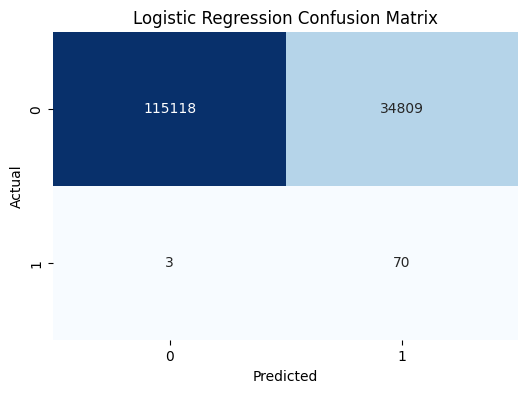

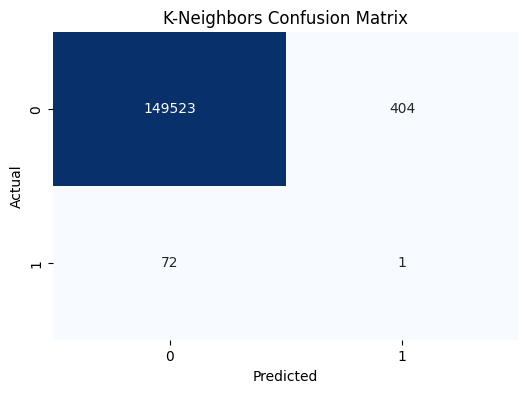

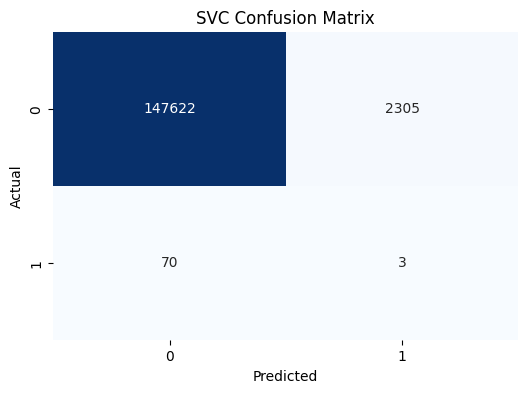

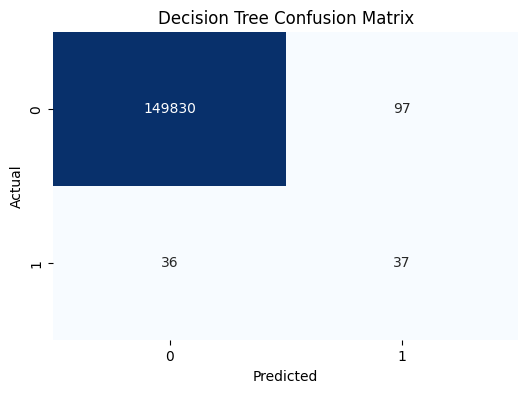

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Confusion matrices for different models
log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

# Plotting confusion matrices
plot_confusion_matrix(log_reg_cf, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(kneighbors_cf, "K-Neighbors Confusion Matrix")
plot_confusion_matrix(svc_cf, "SVC Confusion Matrix")
plot_confusion_matrix(tree_cf, "Decision Tree Confusion Matrix")

In [14]:
# Print classification reports for each model
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log_reg))

print("\nK-Neighbors Classification Report")
print(classification_report(y_test, y_pred_knear))

print("\nSVC Classification Report")
print(classification_report(y_test, y_pred_svc))

print("\nDecision Tree Classification Report")
print(classification_report(y_test, y_pred_tree))


Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    149927
           1       0.00      0.96      0.00        73

    accuracy                           0.77    150000
   macro avg       0.50      0.86      0.44    150000
weighted avg       1.00      0.77      0.87    150000


K-Neighbors Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149927
           1       0.00      0.01      0.00        73

    accuracy                           1.00    150000
   macro avg       0.50      0.51      0.50    150000
weighted avg       1.00      1.00      1.00    150000


SVC Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    149927
           1       0.00      0.04      0.00        73

    accuracy                           0.98    150000
   macro avg       0.50 

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Final Score in the test set of logistic regression
# Logistic Regression with Under-Sampling
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE)
y_pred_sm = log_reg_sm.predict(X_test_scaled)
oversample_score = accuracy_score(y_test, y_pred_sm)

# Create final DataFrame
d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df


,Technique,Score
0,Random UnderSampling,0.999513
1,Oversampling (SMOTE),0.767920


In [5]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
conf_matrix_under = confusion_matrix(y_test, y_pred)
conf_matrix_smote = confusion_matrix(y_test, y_pred_sm)

# Classification Report for Random UnderSampling
print("Classification Report for Random UnderSampling:")
print(classification_report(y_test, y_pred))

# Classification Report for Oversampling (SMOTE)
print("\nClassification Report for Oversampling (SMOTE):")
print(classification_report(y_test, y_pred_sm))


Classification Report for Random UnderSampling:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    149927
           1       0.00      0.00      0.00        73

    accuracy                           1.00    150000
   macro avg       0.50      0.50      0.50    150000
weighted avg       1.00      1.00      1.00    150000


Classification Report for Oversampling (SMOTE):
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    149927
           1       0.00      0.96      0.00        73

    accuracy                           0.77    150000
   macro avg       0.50      0.86      0.44    150000
weighted avg       1.00      0.77      0.87    150000



d:\Project\ITMX-fraud-detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\ITMX-fraud-detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Project\ITMX-fraud-detection\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


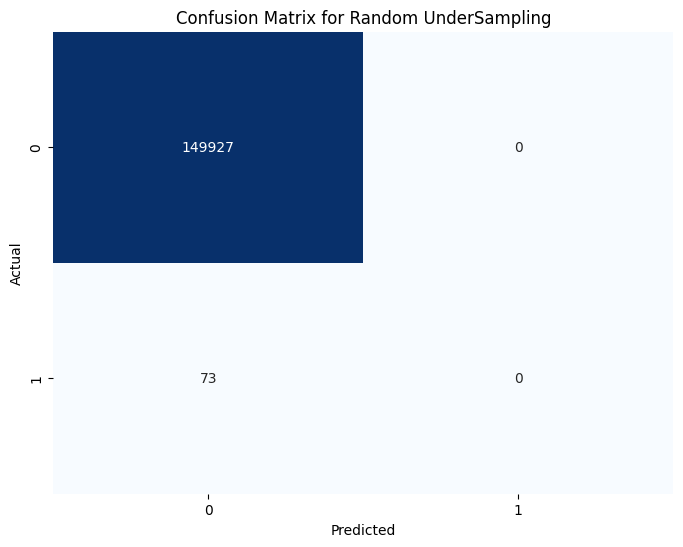

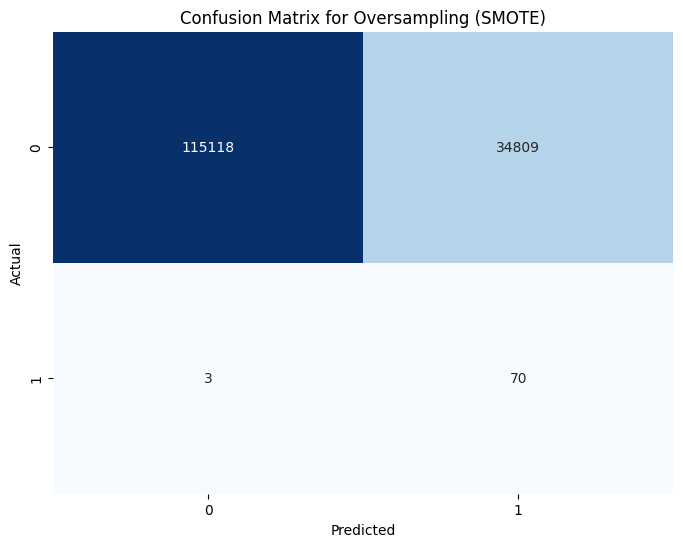

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# สร้าง confusion matrix
conf_matrix_under = confusion_matrix(y_test, y_pred)
conf_matrix_smote = confusion_matrix(y_test, y_pred_sm)

# สร้าง heatmap สำหรับ Random UnderSampling
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_under, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random UnderSampling')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# สร้าง heatmap สำหรับ Oversampling (SMOTE)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Oversampling (SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
